In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [12]:
def simulate_ar1(phi_0, phi_1, T, random_state, plot = False , title = False):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        if title:
            plt.title(r'Cимуляция процесса $Y_t = %.2f + %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        plt.text(x = T*0.95, y = y[0]*1.1, s = r'$\frac{%.2f}{1-%.2f}$' %(phi_0, phi_1), color = 'r')
        plt.show()
    else:
        return y

In [13]:
def simulate_ar2(phi_0, phi_1, phi_2, T, random_state, plot = False, title = False):
    y = np.zeros(T)
    y[0] = phi_0 / (1-phi_1-phi_2)
    y[1] = phi_0 / (1-phi_1-phi_2)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + phi_2*y[t-2] + epsilons[t]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        if title:
            plt.title(r'Cимуляция процесса $Y_t = %.2f + %.2f Y_{t-1} + %.2f Y_{t-2} + \varepsilon_t$' %(phi_0, phi_1, phi_2))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        plt.show()
    else:
        return y

In [14]:
def simulate_ma1(mu, theta_1, T, random_state, plot = False, title = False):
    y = np.zeros(T)
    y[0] = mu
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = mu + epsilons[t] + theta_1*epsilons[t-1]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        if title:
            plt.title(r'Cимуляция процесса $Y_t = %.2f + \varepsilon_t + %.2f \varepsilon_{t-1} $' %(mu, theta_1))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        plt.show()
    else:
        return y

In [15]:
def simulate_ma2(mu, theta_1, theta_2, T, random_state, plot = True):
    y = np.zeros(T)
    y[0] = mu
    y[1] = mu
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(2, T):
        y[t] = mu + epsilons[t] + theta_1*epsilons[t-1] + theta_2*epsilons[t-2]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        if title:
            plt.title(r'Cимуляция процесса $Y_t = %.2f + \varepsilon_t + %.2f \varepsilon_{t-1} + %.2f \varepsilon_{t-2} $' %(mu, theta_1, theta_2))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        plt.show()
    else:
        return y

In [16]:
def simulate_arma11(phi_0, phi_1, theta_1, T, random_state, plot = True):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t] + theta_1*epsilons[t-1]
    return y

In [17]:
def simulate_arma22(phi_0, phi_1, phi_2, theta_1, theta_2, T, random_state, plot = True):
    y = np.zeros(T)
    y[0] = phi_0 / (1-phi_1-phi_2)
    y[1] = phi_0 / (1-phi_1-phi_2)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(2, T):
        y[t] = phi_0 + phi_1*y[t-1] + phi_2*y[t-2] + epsilons[t] + theta_1*epsilons[t-1] + theta_2*epsilons[t-2]
    return y

In [18]:
def plot_ic(evaluation, model_name):
    fig, ax = plt.subplots(1,2, figsize = (8, 4.5))
    plt.suptitle('Критерии AIC и BIC для модели %s при включении $p$ лагов' %model_name)
    ax[0].plot('lag', 'aic', data = evaluation, marker = 'o')
    ax[0].set_xlabel('lag')
    ax[0].set_ylabel('AIC')
    ax[1].plot('lag', 'aic', data = evaluation, marker = 'o')
    ax[1].set_xlabel('lag')
    ax[1].set_ylabel('BIC')
    plt.tight_layout()
    plt.show()

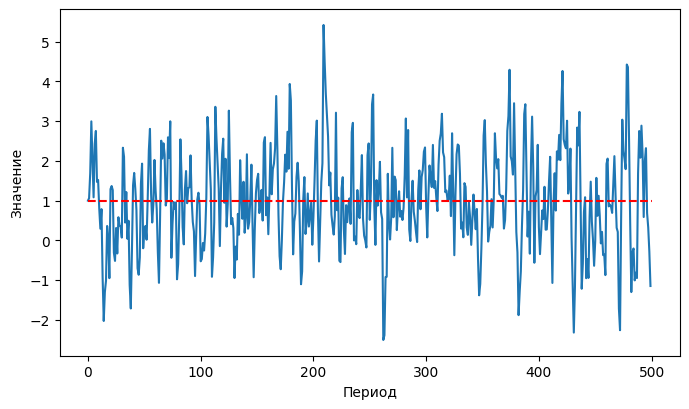

In [19]:
phi_0 = 0.5
phi_1 = 0.7
phi_2 = -0.2
T = 500
y = simulate_ar2(phi_0, phi_1, phi_2, T, random_state = 42)
simulate_ar2(phi_0, phi_1, phi_2, T, random_state = 42, plot = True)

In [20]:
results_ar1 = sm.tsa.arima.ARIMA(y, order=(1, 0, 0)).fit()
print(results_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -710.935
Date:                Sat, 30 Nov 2024   AIC                           1427.871
Time:                        18:23:06   BIC                           1440.514
Sample:                             0   HQIC                          1432.832
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0098      0.107      9.458      0.000       0.801       1.219
ar.L1          0.5767      0.037     15.404      0.000       0.503       0.650
sigma2         1.0051      0.062     16.244      0.0

In [47]:
results_ar2 = sm.tsa.arima.ARIMA(y, order=(2, 0, 0)).fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -699.562
Date:                Sat, 30 Nov 2024   AIC                           1407.124
Time:                        18:41:54   BIC                           1423.982
Sample:                             0   HQIC                          1413.739
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0126      0.086     11.730      0.000       0.843       1.182
ar.L1          0.6981      0.046     15.137      0.000       0.608       0.788
ar.L2         -0.2111      0.046     -4.599      0.0

In [48]:
results_ar3 = sm.tsa.arima.ARIMA(y, order=(3, 0, 0)).fit()
print(results_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -699.494
Date:                Sat, 30 Nov 2024   AIC                           1408.987
Time:                        18:45:45   BIC                           1430.060
Sample:                             0   HQIC                          1417.256
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0128      0.085     11.924      0.000       0.846       1.179
ar.L1          0.6946      0.047     14.884      0.000       0.603       0.786
ar.L2         -0.1996      0.057     -3.524      0.0

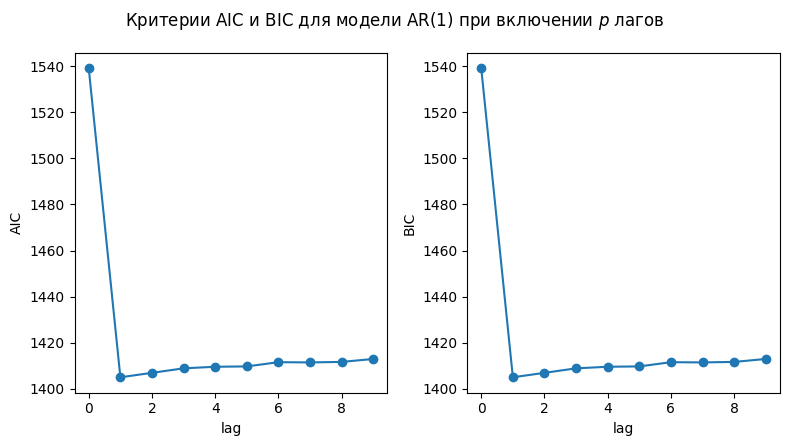

In [41]:
phi_0 = 1
phi_1 = 0.5
T = 500
y = simulate_ar1(phi_0, phi_1, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lag', 'aic', 'bic'])
for i in range(0,10):
    results = sm.tsa.arima.ARIMA(y, order=(i, 0, 0)).fit()
    evaluation.loc[i, ['lag', 'aic', 'bic']] = [i, results.aic, results.bic]
plot_ic(evaluation, 'AR(1)')

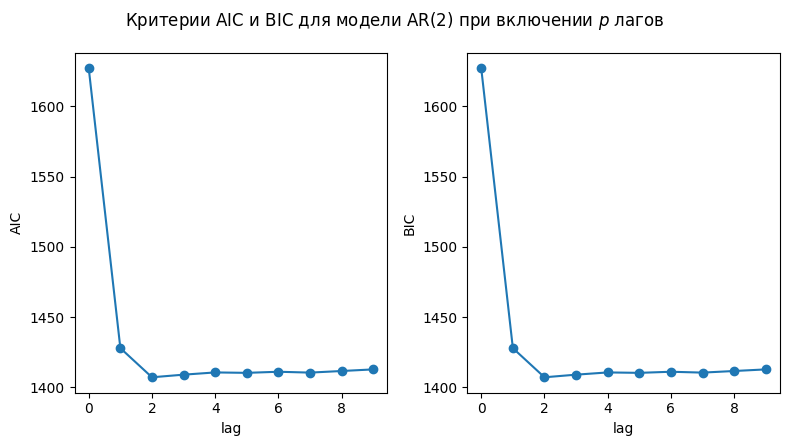

In [49]:
phi_0 = 0.5
phi_1 = 0.7
phi_2 = -0.2
T = 500
y = simulate_ar2(phi_0, phi_1, phi_2, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lag', 'aic', 'bic'])
for i in range(0,10):
    results = sm.tsa.arima.ARIMA(y, order=(i, 0, 0)).fit()
    evaluation.loc[i, ['lag', 'aic', 'bic']] = [i, results.aic, results.bic]
plot_ic(evaluation, 'AR(2)')

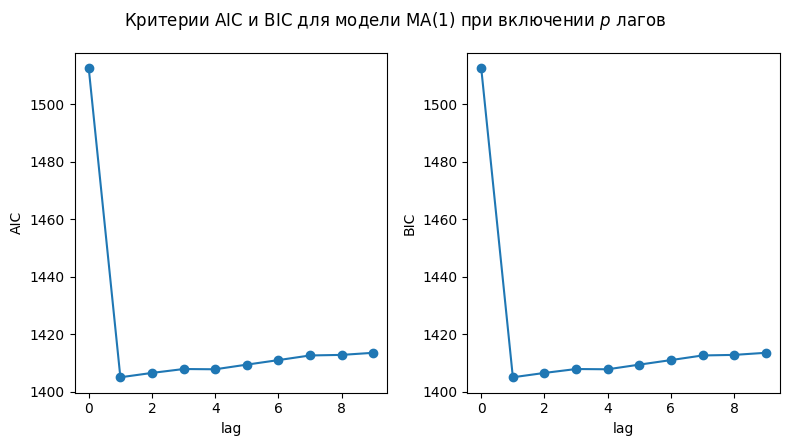

In [43]:
mu = 1
theta_1 = 0.5
T = 500
y = simulate_ma1(mu, theta_1, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lag', 'aic', 'bic'])
for i in range(0,10):
    results = sm.tsa.arima.ARIMA(y, order=(0, 0, i)).fit()
    evaluation.loc[i, ['lag', 'aic', 'bic']] = [i, results.aic, results.bic]
plot_ic(evaluation, 'MA(1)')

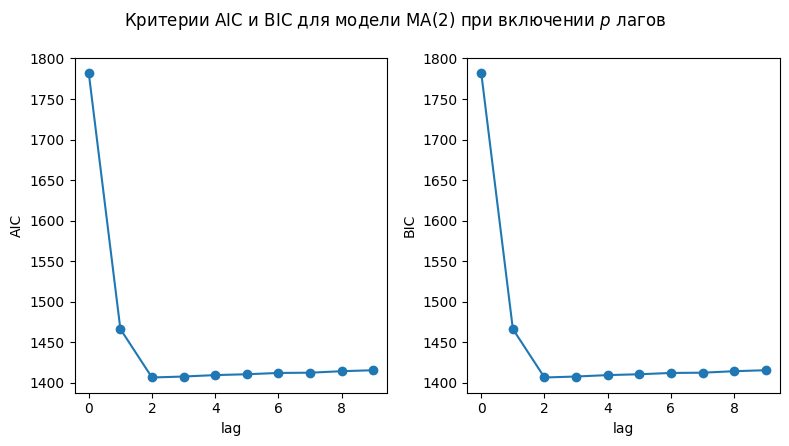

In [44]:
mu = 1
theta_1 = 1
theta_2 = 0.4
T = 500
y = simulate_ma2(mu, theta_1, theta_2, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lag', 'aic', 'bic'])
for i in range(0,10):
    results = sm.tsa.arima.ARIMA(y, order=(0, 0, i)).fit()
    evaluation.loc[i, ['lag', 'aic', 'bic']] = [i, results.aic, results.bic]
plot_ic(evaluation, 'MA(2)')

In [58]:
phi_0 = 1
phi_1 = 0.5
theta_1 = 2
T = 500
y = simulate_arma11(phi_0, phi_1, theta_1, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lagAR', 'lagMA', 'aic', 'bic'])
row = 0
for i in range(0,5):
    for j in range(0,5):
        results = sm.tsa.arima.ARIMA(y, order=(i, 0, j)).fit()
        evaluation.loc[row, ['lagAR', 'lagMA', 'aic', 'bic']] = [i, j, results.aic, results.bic]
        row += 1

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoreg

In [65]:
evaluation.sort_values(by = 'aic').head()

,lagAR,lagMA,aic,bic
18,3,3,2096.33654,2130.053404
19,3,4,2099.191569,2137.123042
3,0,3,2100.03464,2121.107681
24,4,4,2100.098873,2142.244954
6,1,1,2100.210918,2117.06935


In [66]:
evaluation.sort_values(by = 'bic').head()

,lagAR,lagMA,aic,bic
6,1,1,2100.210918,2117.06935
3,0,3,2100.03464,2121.107681
11,2,1,2101.865791,2122.938832
7,1,2,2102.010405,2123.083446
4,0,4,2100.831119,2126.118767


In [67]:
phi_0 = 1
phi_1 = -0.5
phi_2 = 0.4
theta_1 = 2
theta_2 = 0.5
T = 500
y = simulate_arma22(phi_0, phi_1, phi_2, theta_1, theta_2, T, random_state = 42)
evaluation = pd.DataFrame(columns = ['lagAR', 'lagMA', 'aic', 'bic'])
row = 0
for i in range(0,5):
    for j in range(0,5):
        results = sm.tsa.arima.ARIMA(y, order=(i, 0, j)).fit()
        evaluation.loc[row, ['lagAR', 'lagMA', 'aic', 'bic']] = [i, j, results.aic, results.bic]
        row += 1

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarni

In [68]:
evaluation.sort_values(by = 'aic').head()

,lagAR,lagMA,aic,bic
16,3,1,1943.751112,1969.038761
9,1,4,1944.164645,1973.666902
12,2,2,1944.395103,1969.682752
11,2,1,1944.658461,1965.731501
13,2,3,1944.839692,1974.341948


In [69]:
evaluation.sort_values(by = 'bic').head()

,lagAR,lagMA,aic,bic
11,2,1,1944.658461,1965.731501
16,3,1,1943.751112,1969.038761
12,2,2,1944.395103,1969.682752
8,1,3,1945.460129,1970.747777
9,1,4,1944.164645,1973.666902
